In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("E:\Machine_learning\credit_card_fraud_detection\data\CreditCardData.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\KRISHNA PRAKASH\AppData\Local\Temp\ipykernel_26204\3071667917.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("E:\Machine_learning\credit_card_fraud_detection\data\CreditCardData.csv")


In [3]:
df.head(5)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [4]:
df.count()

Transaction ID            100000
Date                      100000
Day of Week               100000
Time                      100000
Type of Card              100000
Entry Mode                100000
Amount                     99994
Type of Transaction       100000
Merchant Group             99990
Country of Transaction    100000
Shipping Address           99995
Country of Residence      100000
Gender                     99996
Age                       100000
Bank                      100000
Fraud                     100000
dtype: int64

In [5]:
df.isnull().sum()

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64

In [6]:
df.drop_duplicates()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99977 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          99977 non-null  object 
 1   Date                    99977 non-null  object 
 2   Day of Week             99977 non-null  object 
 3   Time                    99977 non-null  int64  
 4   Type of Card            99977 non-null  object 
 5   Entry Mode              99977 non-null  object 
 6   Amount                  99977 non-null  object 
 7   Type of Transaction     99977 non-null  object 
 8   Merchant Group          99977 non-null  object 
 9   Country of Transaction  99977 non-null  object 
 10  Shipping Address        99977 non-null  object 
 11  Country of Residence    99977 non-null  object 
 12  Gender                  99977 non-null  object 
 13  Age                     99977 non-null  float64
 14  Bank                    99977 non-null  obj

In [9]:
print(df['Fraud'].sum(), df['Fraud'].count())


7192 99977


In [10]:
total_transactions = df['Fraud'].count()
fraud_transactions = df['Fraud'].sum()

percentage_of_fraud_transactions = fraud_transactions/total_transactions * 100
percentage_of_fraud_transactions

7.193654540544325

In [11]:
non_fraud_transactions = total_transactions - fraud_transactions

non_fraud_transactions

92785

In [12]:
df['Amount'] = df['Amount'].str.replace('£', '').astype(float)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\KRISHNA PRAKASH\AppData\Local\Temp\ipykernel_26204\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99977 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transaction ID          99977 non-null  object        
 1   Date                    99977 non-null  datetime64[ns]
 2   Day of Week             99977 non-null  object        
 3   Time                    99977 non-null  int64         
 4   Type of Card            99977 non-null  object        
 5   Entry Mode              99977 non-null  object        
 6   Amount                  99977 non-null  float64       
 7   Type of Transaction     99977 non-null  object        
 8   Merchant Group          99977 non-null  object        
 9   Country of Transaction  99977 non-null  object        
 10  Shipping Address        99977 non-null  object        
 11  Country of Residence    99977 non-null  object        
 12  Gender                  99977 non-null  object     

DATA VISUALIZATION

In [15]:
df_fraud = df[df['Fraud'] == 1]

In [16]:
df_fraud.head(6)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,#2771 031,2020-10-13,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
11,#3474 192,2020-10-14,Wednesday,1,MasterCard,PIN,106.0,POS,Fashion,Russia,Russia,United Kingdom,F,48.7,Metro,1
16,#3513 029,2020-10-13,Tuesday,0,MasterCard,CVC,25.0,Online,Food,Russia,Russia,United Kingdom,M,54.3,Barlcays,1
37,#3316 175,2020-10-14,Wednesday,3,MasterCard,PIN,5.0,ATM,Services,China,China,United Kingdom,F,62.8,Barlcays,1
42,#2617 497,2020-10-14,Wednesday,4,Visa,PIN,206.0,POS,Children,United Kingdom,India,United Kingdom,M,46.3,Barclays,1
51,#2728 567,2020-10-13,Tuesday,1,MasterCard,Tap,30.0,POS,Children,United Kingdom,China,United Kingdom,F,37.2,Barclays,1


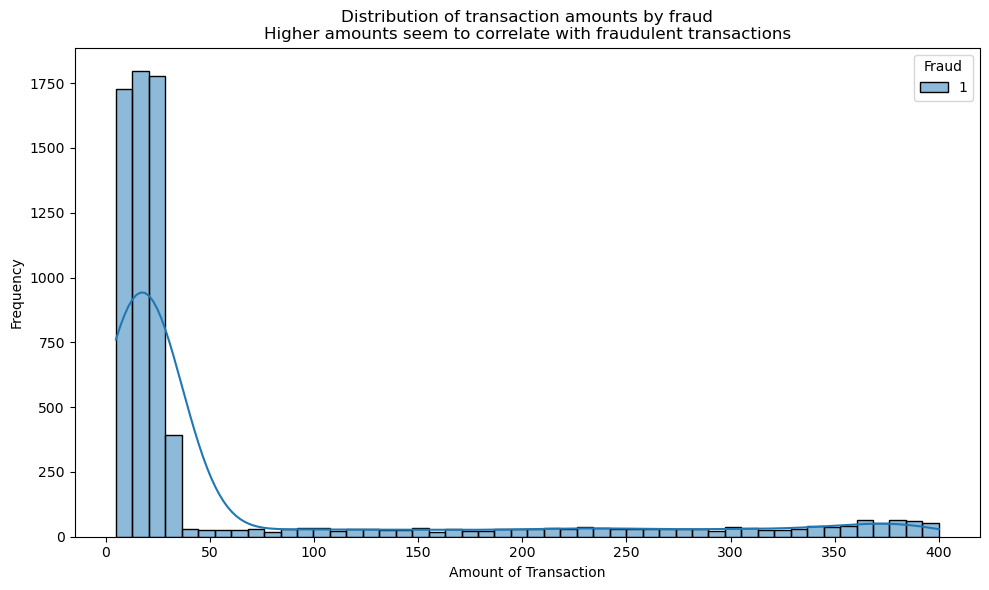

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data = df_fraud, x = 'Amount', hue = 'Fraud', kde = True, bins = 50)

plt.title('Distribution of transaction amounts by fraud\nHigher amounts seem to correlate with fraudulent transactions')
plt.xlabel('Amount of Transaction')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

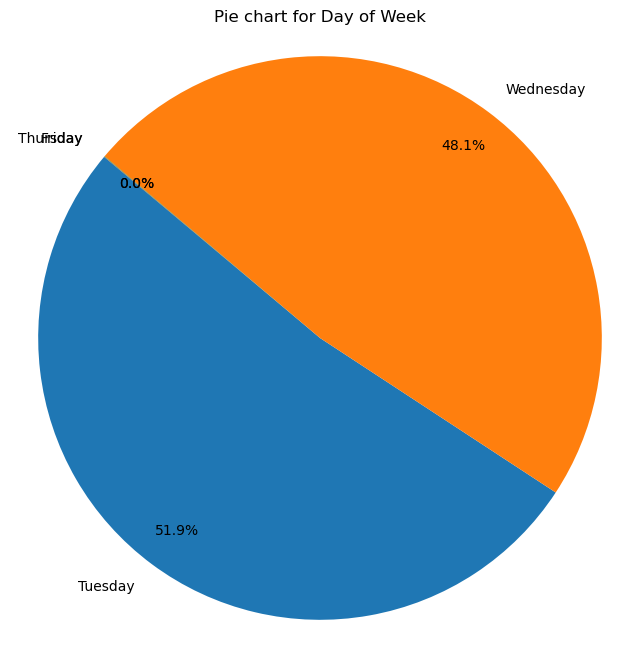

For the column 'Day of Week', the most common value is 'Tuesday' which represents 51.9% of the data.


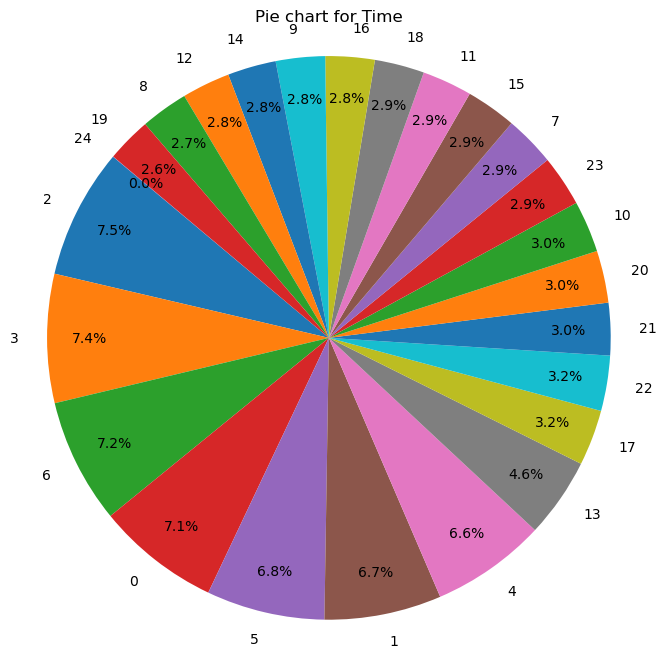

For the column 'Time', the most common value is '2' which represents 7.5% of the data.


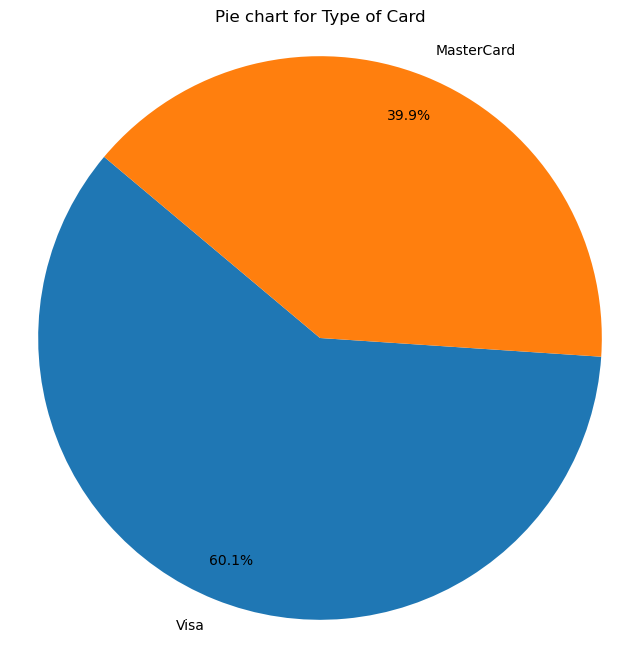

For the column 'Type of Card', the most common value is 'Visa' which represents 60.1% of the data.


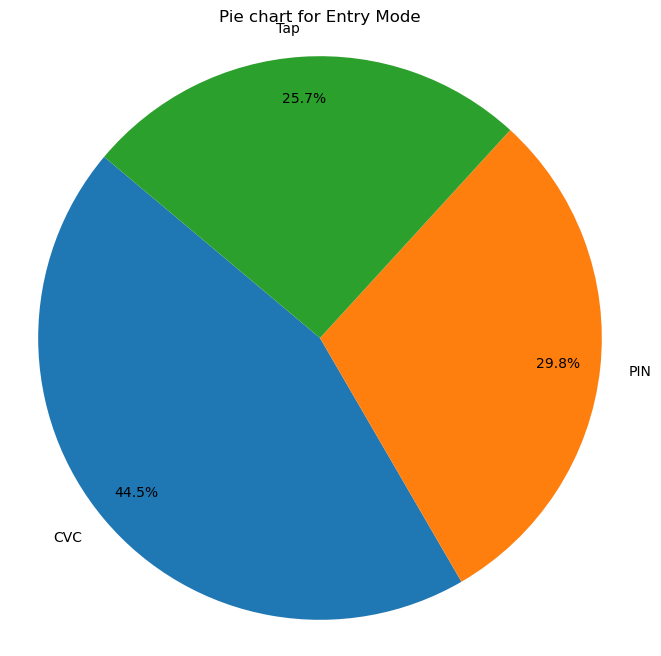

For the column 'Entry Mode', the most common value is 'CVC' which represents 44.5% of the data.


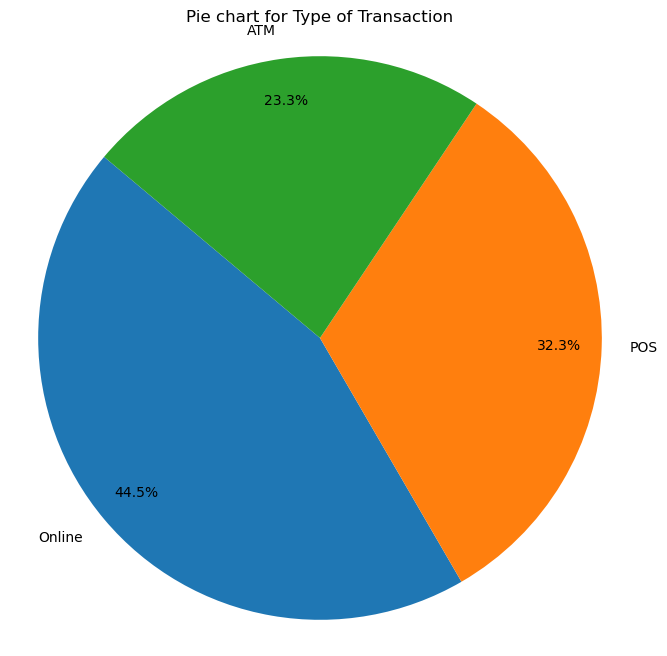

For the column 'Type of Transaction', the most common value is 'Online' which represents 44.5% of the data.


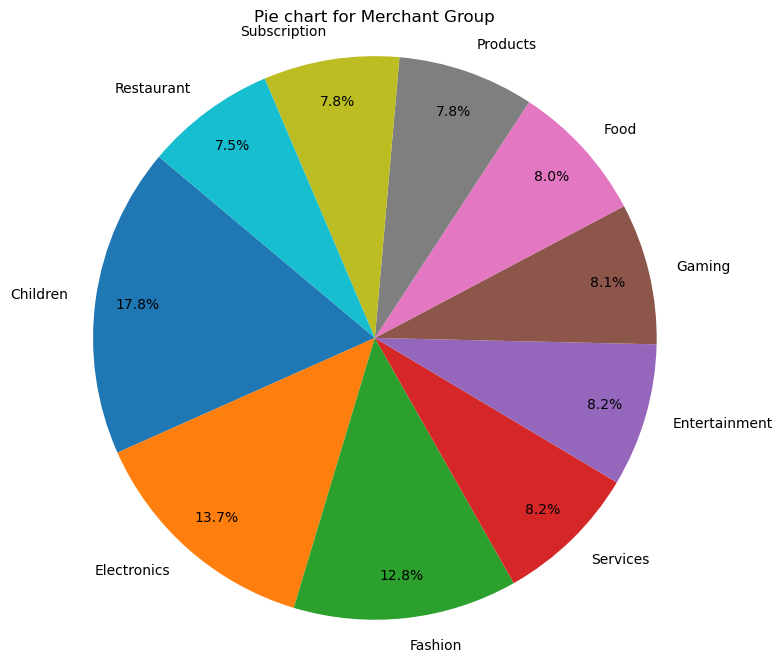

For the column 'Merchant Group', the most common value is 'Children' which represents 17.8% of the data.


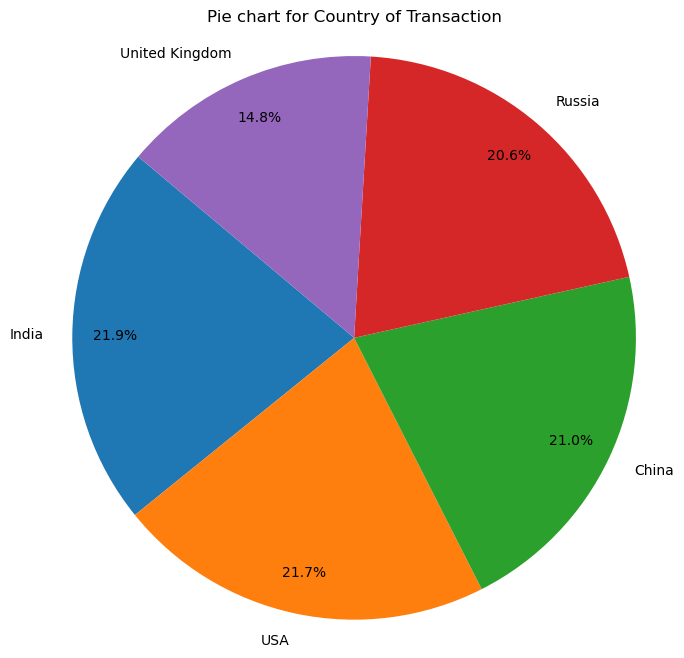

For the column 'Country of Transaction', the most common value is 'India' which represents 21.9% of the data.


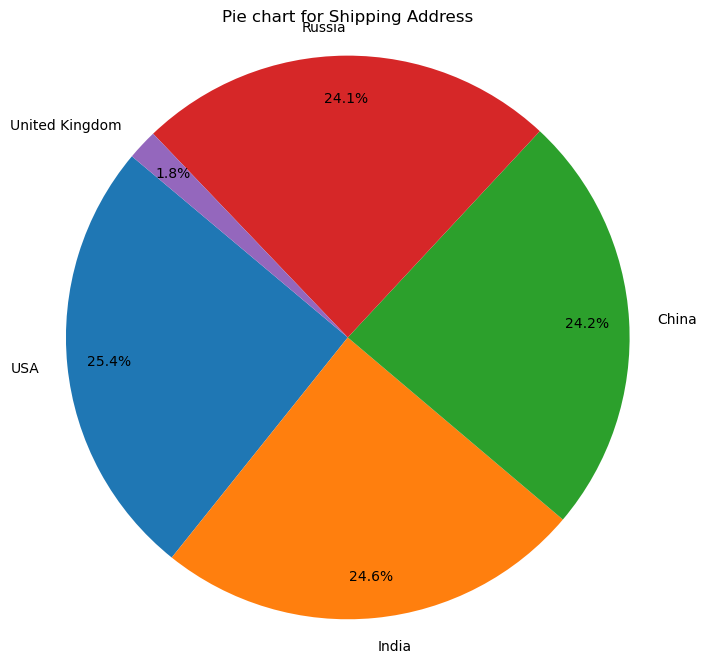

For the column 'Shipping Address', the most common value is 'USA' which represents 25.4% of the data.


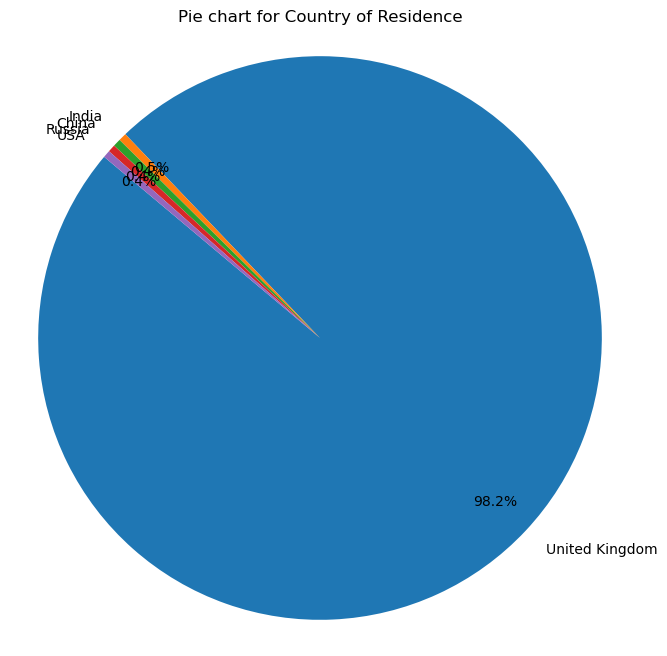

For the column 'Country of Residence', the most common value is 'United Kingdom' which represents 98.2% of the data.


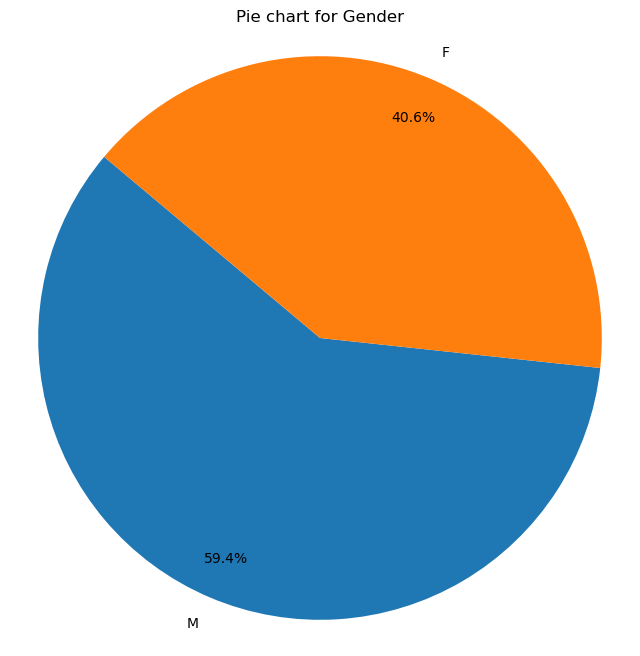

For the column 'Gender', the most common value is 'M' which represents 59.4% of the data.


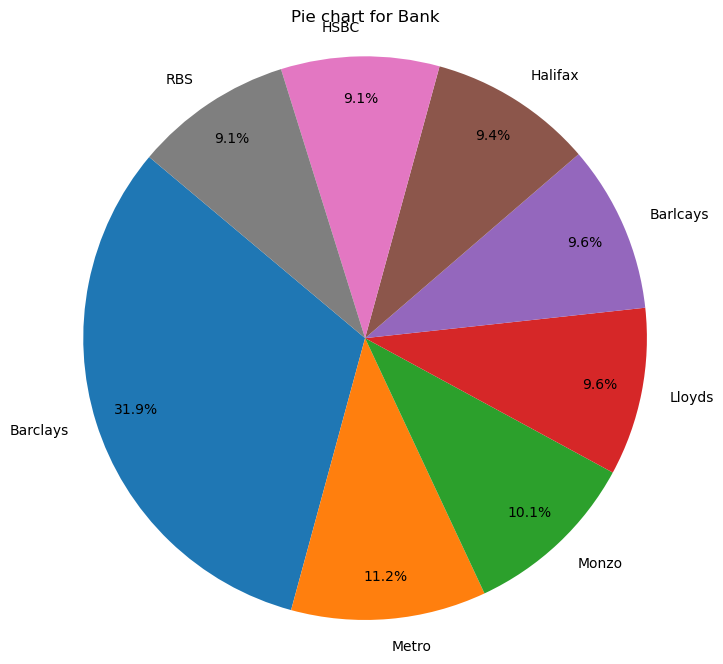

For the column 'Bank', the most common value is 'Barclays' which represents 31.9% of the data.


In [18]:
import matplotlib.pyplot as plt

column_piechart = ['Day of Week', 'Time', 'Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Gender', 'Bank']

for column in column_piechart:
    if df_fraud[column].dtype in ['object', 'int64', 'float64']: 
        value_counts = df_fraud[column].value_counts()
        
        # Create a pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
        plt.title(f'Pie chart for {column}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
        
        # Generate an interpretative sentence
        most_common_value = value_counts.idxmax()
        most_common_percentage = (value_counts.max() / value_counts.sum()) * 100
        print(f"For the column '{column}', the most common value is '{most_common_value}' which represents {most_common_percentage:.1f}% of the data.")

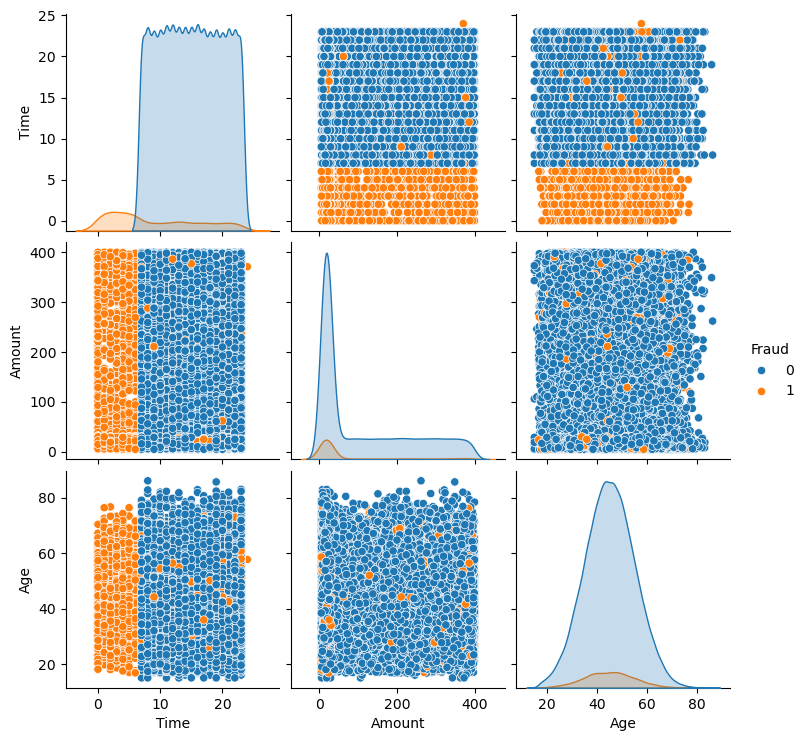

In [19]:
sns.pairplot(df, hue = 'Fraud')
plt.show()

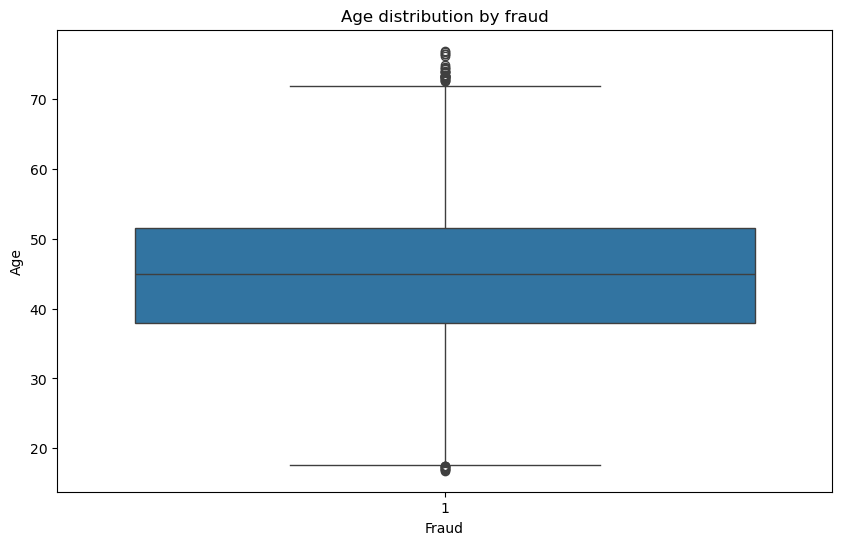

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud', y='Age', data=df_fraud)
plt.title('Age distribution by fraud')
plt.show()

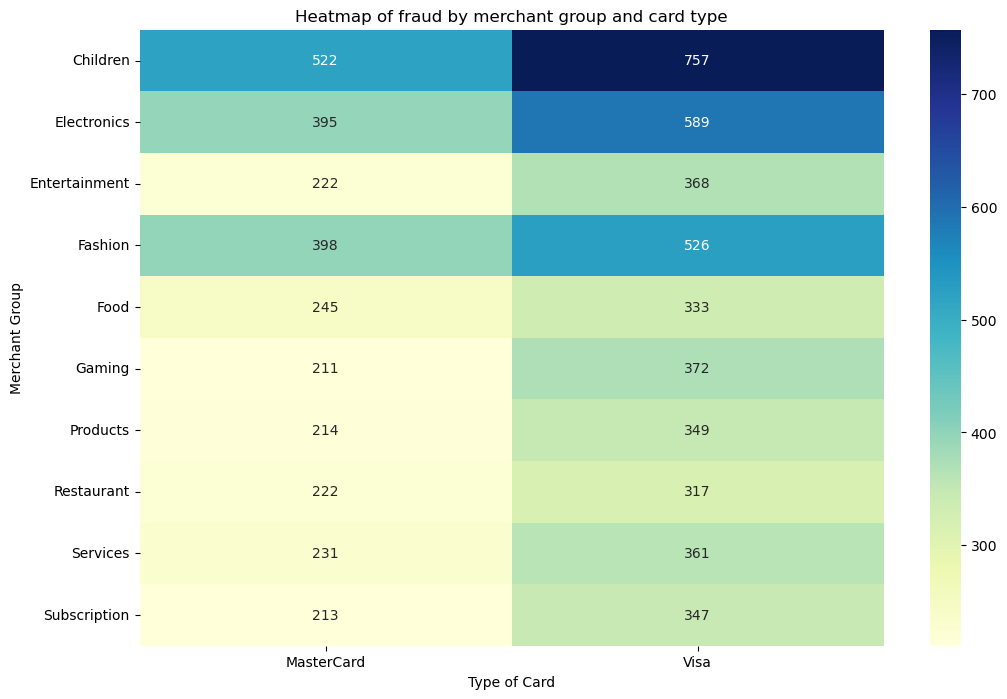

In [23]:
pivot_table = pd.pivot_table(df_fraud, values='Transaction ID', index='Merchant Group', columns='Type of Card', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of fraud by merchant group and card type')
plt.show()